In [ ]:
!pip uninstall keras-nightly
!pip uninstall -y tensorflow
!pip install h5py==2.10.0
!pip install tensorflow==1.15.0
!pip install tensorflow-gpu==1.15.0
!pip install keras==2.1.6

Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 13.0 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 3.8 MB 55.1 MB/s 
     |████████████████████████████████| 50 kB 8.3 MB/s 
     |████████████████████████████████| 503 kB 73.2 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=b5d7d8c33d32647e883569869ed4fa9bcbe9f20d573e9c44284fbcfc114f365d
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting un

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 411.5 MB 8.7 kB/s 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 339 kB 13.2 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [ ]:
from keras.layers import LSTM, Embedding, Dense, Conv1D,MaxPooling1D,Flatten,GRU
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import metrics

Using TensorFlow backend.


In [ ]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
pd.unique(df.v1)

array(['ham', 'spam'], dtype=object)

In [ ]:
d1 = {'spam': 1 , 'ham': 0}
df['v1'] = df['v1'].map(d1)

In [ ]:
labels=np.asarray(df.v1)
texts=np.asarray(df.v2).astype('<U910')
print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [ ]:
maxlen = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
df = pad_sequences(sequences, maxlen=maxlen)
np.random.seed(42)

indices = np.arange(df.shape[0])
np.random.shuffle(indices)
df = df[indices]
clases = labels[indices]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, clases, test_size=0.2, shuffle=True)

In [ ]:
embedding_dim = 100
max_features = 10000
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))
#model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                6240      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 326,273
Trainable params: 6,273
Non-trainable params: 320,000
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])

gru = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.16)

Train on 3743 samples, validate on 714 samples
Epoch 1/10
3743/3743 [==============================] - 23s 6ms/step - loss: 0.3926 - acc: 0.8568 - val_loss: 0.2857 - val_acc: 0.8754
Epoch 2/10
3743/3743 [==============================] - 21s 6ms/step - loss: 0.3076 - acc: 0.8613 - val_loss: 0.2716 - val_acc: 0.8754
Epoch 3/10
3743/3743 [==============================] - 22s 6ms/step - loss: 0.2991 - acc: 0.8624 - val_loss: 0.2989 - val_acc: 0.8838
Epoch 4/10
3743/3743 [==============================] - 20s 5ms/step - loss: 0.2915 - acc: 0.8632 - val_loss: 0.2444 - val_acc: 0.8754
Epoch 5/10
3743/3743 [==============================] - 20s 5ms/step - loss: 0.2871 - acc: 0.8651 - val_loss: 0.2392 - val_acc: 0.8824
Epoch 6/10
3743/3743 [==============================] - 21s 6ms/step - loss: 0.2784 - acc: 0.8707 - val_loss: 0.2327 - val_acc: 0.8894
Epoch 7/10
3743/3743 [==============================] - 22s 6ms/step - loss: 0.2745 - acc: 0.8750 - val_loss: 0.2419 - val_acc: 0.9048
Epoch 8/

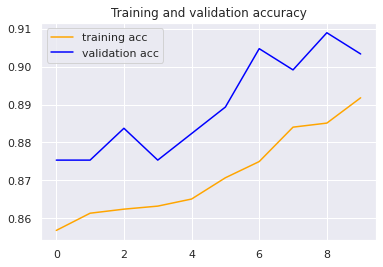

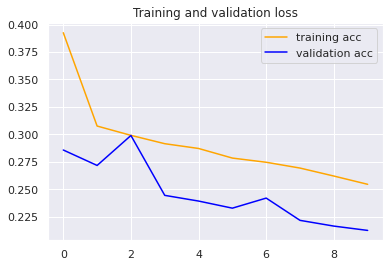

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = gru.history['acc']
val_acc = gru.history['val_acc']
loss = gru.history['loss']
val_loss = gru.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict_classes(X_test)
acc = model.evaluate(X_test, y_test)
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
cm = confusion_matrix(pred, y_test)

1115/1115 [==============================] - 1s 863us/step
Test loss is 0.24 accuracy is 0.89  


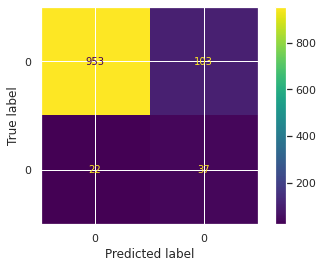

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, pred))
print("Precision:", metrics.precision_score(y_test, pred))
print("Recall:", metrics.recall_score(y_test, pred))

Accuracy: 0.8878923766816144
Precision: 0.6271186440677966
Recall: 0.2642857142857143
